# Analysis of COVID-19 Cases in the world

Some requirements:

- ~~Convert data into tidy format~~
- ~~Export to normalized tables in SQLite3 Database~~
- Use SQL statements (from within pandas) to retrieve data needed for each visualization

### Visualization 2: 
#### Is there a correlation between number of medical doctors per 1000 people and the number of deaths?


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [44]:
# Connecting database using SQLite3

conn = sqlite3.connect("../database/data.db")
cur = conn.cursor()

In [46]:
smalltable2_create = '''CREATE TABLE SMALLTABLE2 AS SELECT `Hospital beds per 1000 people`, `Medical doctors per 1000 people`, SUM(Deaths) AS `Total Deaths` FROM covidstats GROUP BY COUNTRY'''
smalltable2_read = '''SELECT * FROM SMALLTABLE2'''

cur.execute(smalltable2_create)
smalltable2 = pd.read_sql_query(smalltable2_read, conn)
smalltable2

,Hospital beds per 1000 people,Medical doctors per 1000 people,Total Deaths
0,2.89,1.29,171892.0
1,1.90,1.83,547843.0
2,5.00,3.91,6622663.0
3,4.20,2.80,428678.0
4,3.84,3.50,186575.0
...,...,...,...
99,2.77,2.57,73071478.0
100,2.80,3.74,36814.0
101,2.60,0.82,6973.0
102,2.00,0.09,96458.0


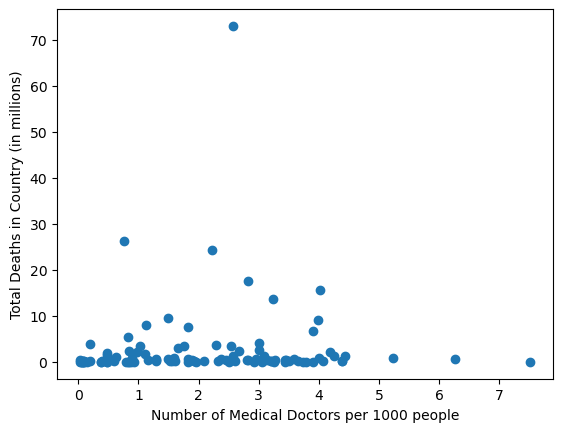

In [ ]:
x = smalltable2['Medical doctors per 1000 people']
y = smalltable2['Total Deaths'] / 1e6

plt.xlabel("Number of Medical Doctors per 1000 people")
plt.ylabel("Total Deaths in Country (in millions)")
plt.scatter(x, y)

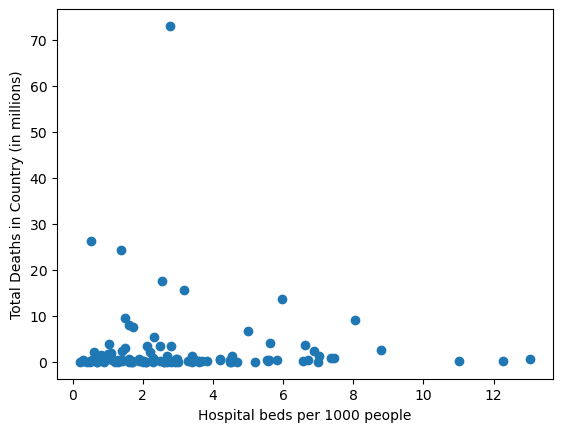

In [ ]:
x = smalltable2['Hospital beds per 1000 people']
y = smalltable2['Total Deaths'] / 1e6

plt.xlabel("Hospital beds per 1000 people")
plt.ylabel("Total Deaths in Country (in millions)")
plt.scatter(x, y)

### Conclusion:

- Looking at the two graphs, there is no obvious correlation between number of hospital beds & doctors and the total number of deaths in that country.